In [105]:
library(ggplot2)
library(matrixStats)
library(psych)
library(dplyr)

options(repr.plot.width = 10, repr.plot.height = 8)

# Estimates of Location

In [106]:
state <- read.csv('data/state.csv')
head(state)

,State,Population,Murder.Rate,Abbreviation
,<chr>,<int>,<dbl>,<chr>
1,Alabama,4779736,5.7,AL
2,Alaska,710231,5.6,AK
3,Arizona,6392017,4.7,AZ
4,Arkansas,2915918,5.6,AR
5,California,37253956,4.4,CA
6,Colorado,5029196,2.8,CO


In [108]:
mean(state$Population)

[1] 6162876

In [109]:
mean(state$Population, trim = 0.1)

[1] 4783697

In [110]:
median(state$Population)

[1] 4436370

In [112]:
weighted.mean(state$Murder.Rate, w = state$Population)

[1] 4.445834

In [121]:
weightedMedian(state$Murder.Rate, w = state$Population)

[1] 4.4

# Estimates of Variability

In [122]:
summary(state)

    State             Population        Murder.Rate     Abbreviation      
 Length:50          Min.   :  563626   Min.   : 0.900   Length:50         
 Class :character   1st Qu.: 1833004   1st Qu.: 2.425   Class :character  
 Mode  :character   Median : 4436370   Median : 4.000   Mode  :character  
                    Mean   : 6162876   Mean   : 4.066                     
                    3rd Qu.: 6680312   3rd Qu.: 5.550                     
                    Max.   :37253956   Max.   :10.300                     

In [123]:
describe(state %>% select(Population, Murder.Rate))

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Population,1,50,6162876.300,6.848235e+06,4436370,4783697.125,3.84987e+06,563626.0,37253956.0,36690330.0,2.4861907,7.3303878,9.684867e+05
Murder.Rate,2,50,4.066,1.915736e+00,4,3.945,2.37216e+00,0.9,10.3,9.4,0.7343986,0.6555232,2.709260e-01


In [124]:
sd(state$Population)

[1] 6848235

In [125]:
IQR(state$Population)

[1] 4847308

In [127]:
mad(state$Population)

[1] 3849870

# Exploring the Data Distribution

In [141]:
print(quantile(state$Population, p = c(0.05, 0.25, 0.5, 0.75, 0.95)))

      5%      25%      50%      75%      95% 
  689529  1833004  4436370  6680312 19118546 


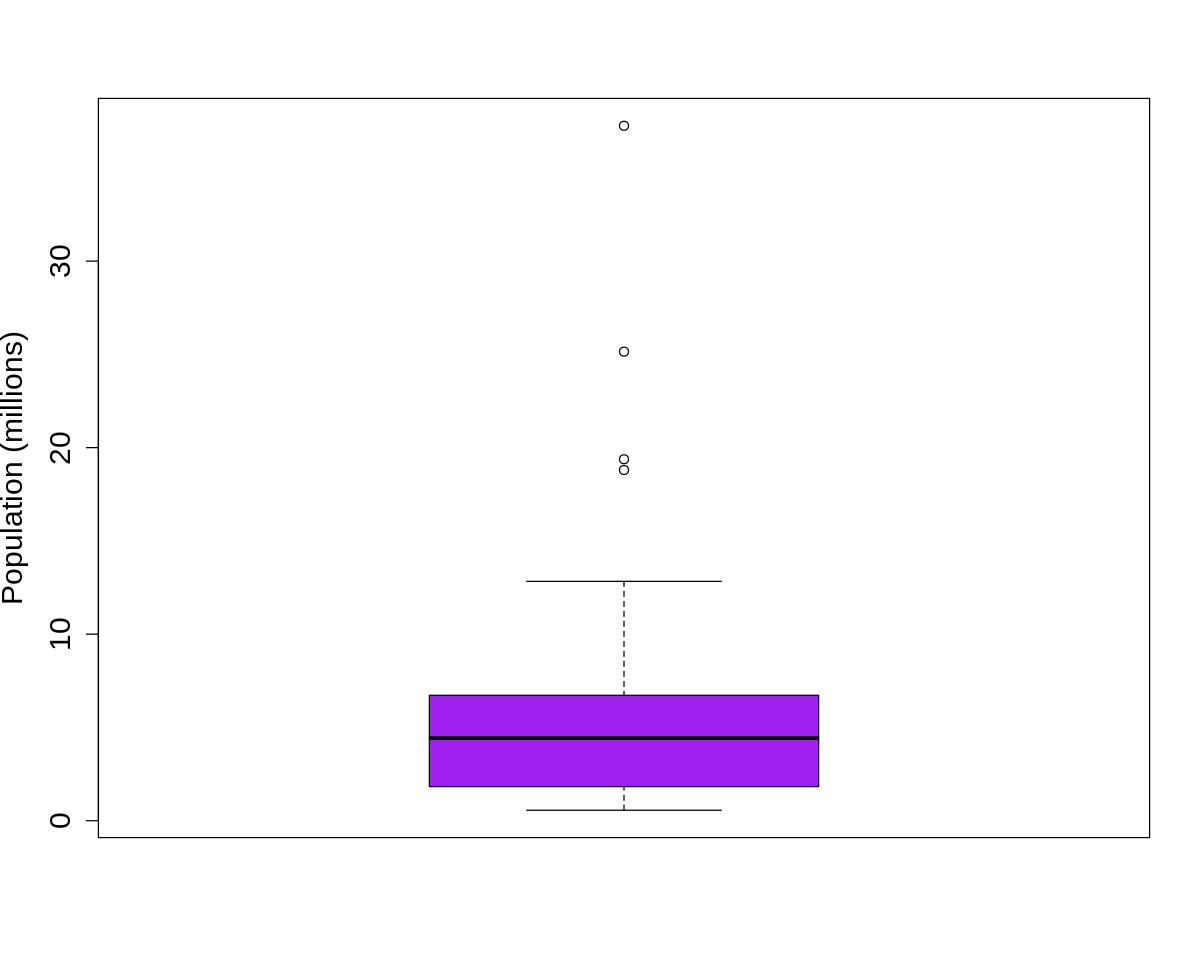

In [164]:
boxplot(state$Population / 1000000, ylab = 'Population (millions)', cex.lab = 1.5, cex.axis = 1.5, col = 'purple', alpha = 0.2)

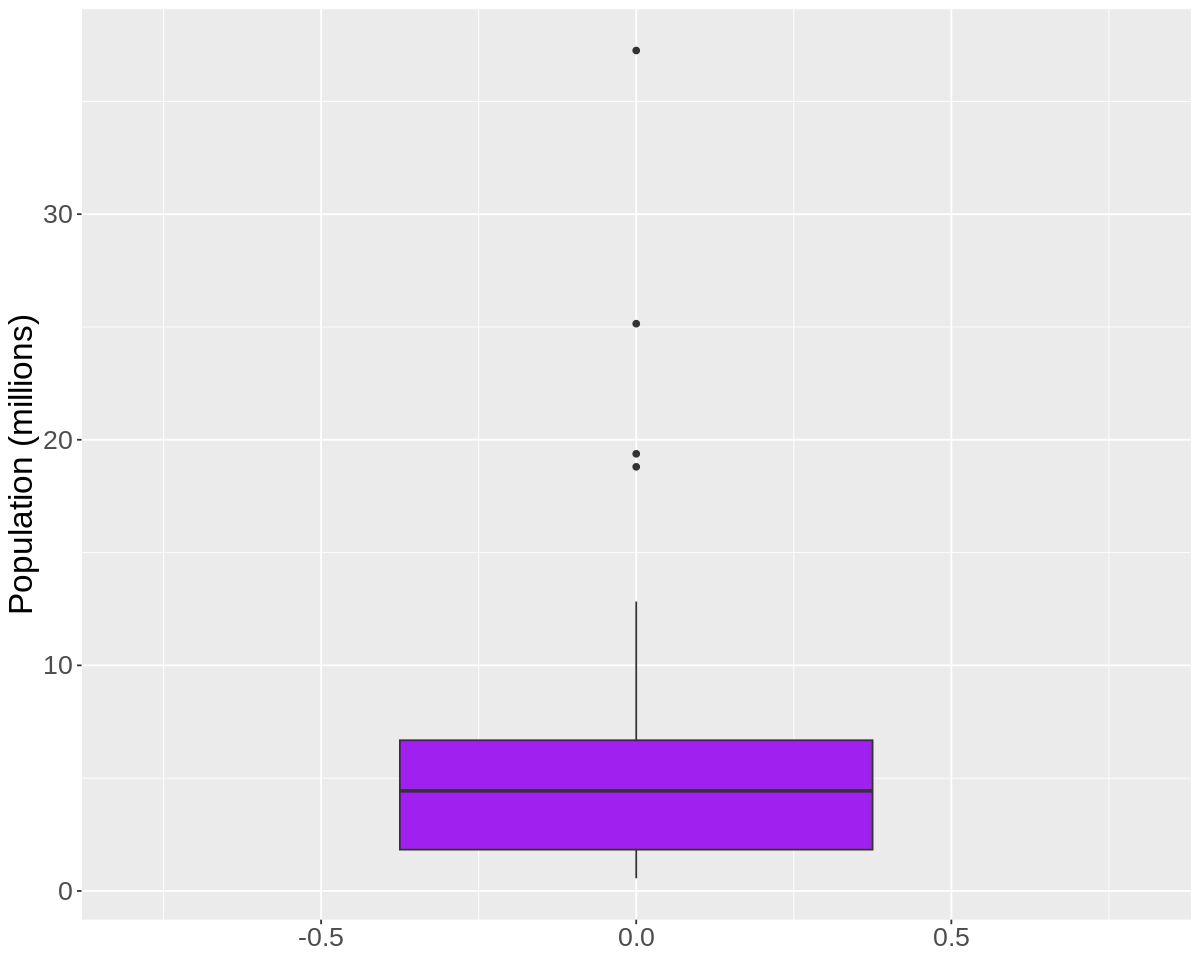

In [166]:
ggplot(state) +
    geom_boxplot(aes(y = Population / 1000000), fill = 'purple') +
    ylab('Population (millions)') +
    theme(text = element_text(size = 20)) +
    coord_cartesian(xlim = c(-0.8, 0.8))